### Week 6 - Exercise 1 

Network Analysis in Computational Social Science


In [38]:
import itertools 
import pandas as pd 
import networkx as nx 
import random
import netwulf as nw 
import matplotlib.pyplot as plt 

In [39]:
# Create network like the one in week 4 


def count_papers(author_id, authors_ids_list): 
    author1 = author_id[0]
    author2 = author_id[1]
    count = sum(1 for article in authors_ids_list if author1 in article and author2 in article)
    return count 

def create_weighted_egdes(papers, graph): 
    w_edge_list = [] 
    authors_ids = papers["author_ids"].to_list()
    for author_id in authors_ids: 
        # If only one author, add single node, if that would be requested 
        # if len(author_id) == 1: 
        #     graph.add_nodes_from(author_id[0])

         # If there are only two authors 
        if len(author_id) == 2 and author_id not in w_edge_list:
            # Find how many times the author pair appears in list of author ids
            papers_nr = count_papers(author_id, authors_ids) 
            w_edge_list.append((author_id[0], author_id[1], papers_nr))

        # If more than 2 - compute all combinations of authors 
        if len(author_id) > 2: 
            combinations = list(itertools.combinations(author_id, 2))
            for combination in combinations: 
                if combination not in w_edge_list:
                    # Find how many times the author pair appears in list of author ids
                    papers_nr = count_papers(combination, authors_ids) 
                    w_edge_list.append((combination[0], combination[1], papers_nr))
    return w_edge_list, graph 



In [40]:
# Get an N sample of articles 
N = 5
papers_og = pd.read_csv("data/papers_dataset.csv")
co_papers = pd.read_csv("data/IC2S2_co_articles.csv")
papers = pd.concat([papers_og, co_papers])

citations = papers["cited_by_count"]
sample_papers = papers.sample(n = N)



In [41]:
graph = nx.Graph()
weighted_egdes, graph = create_weighted_egdes(sample_papers, graph)
graph.add_weighted_edges_from(weighted_egdes)

In [42]:
degrees = graph.degree() 
nr_edges = graph.number_of_edges()


In [43]:
# Save it as a dictionary 
positions, b = nw.visualize(graph)

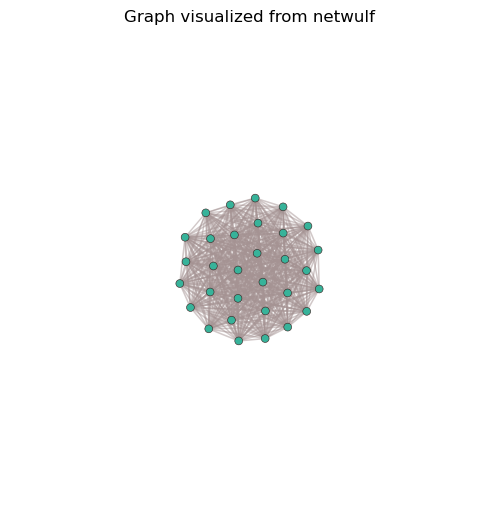

In [44]:
# Visulatize it in Pyhton 
fig, ax = nw.draw_netwulf(positions)
plt.title(f"Graph visualized from netwulf")
plt.show()


In [45]:
# Calculate the Assortativity Coefficient 
# Nodes with large degree connect to nodes with large or small degree? 

def calc_assortativity_coeff(degrees, nr_edges):

    # AC = same_type_edges - expected_same_type_edges / (1 - normalization_term)
    
    sum = 0
    for edge in graph.edges():
        degree_product = degrees[edge[0]] * degrees[edge[1]]
        sum += degree_product

    sum_degrees_squared = sum(degree ** 2 for degree in degrees.values())
    avg_degree_product = sum / nr_edges
    same_type_edges = avg_degree_product / sum_degrees_squared
    expected_same_type_edges = sum_degrees_squared/nr_edges
    AC = (same_type_edges - (expected_same_type_edges)) / (1 - expected_same_type_edges)

    return AC 

In [46]:
# Implement the configuration model using the double edge swap algorithm to generate random networks

def generate_edges(network_copy): 
    edges = network_copy.edges() 
    e1 = random.choice(list(edges))
    e2 = random.choice(list(edges)) 
    while e1 == e2: 
        e2 = random.choice(list(edges))
    
    return e1, e2

def dobuel_swap_alg(graph): 
    network_copy = graph.copy() 
    nr_of_edges = graph.number_of_edges()

    for _ in range(10*nr_of_edges):
        
        # Select two edges (distinct)
        e1, e2 = generate_edges(network_copy)

        # Ensure that the new edges do not already exist in your network
        e1_prime = (e1[0], e2[1])
        e2_prime = (e2[0], e1[1])
        while network_copy.has_edge(*e1_prime) or network_copy.has_edge(*e2_prime):
            # Change the e1, e2  
            e1, e2 = generate_edges(network_copy)
            e1_prime = (e1[0], e2[1])
            e2_prime = (e2[0], e1[1])

        # Flip the direction 50 % of the time 
        r = random.random() 
        if r >= 0.5:
            e1 = (e1[1], e1[0])
    
        # Remove and add egdes 
        network_copy.remove_edge(*e1)
        network_copy.remove_edge(*e2)
        network_copy.add_edge(*e1_prime)
        network_copy.add_edge(*e2_prime)

    return network_copy 


Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

### Part 3 

In [47]:
# Generate at least 100 random netwrosk using configuration model 
n = 100 
networks = [] 
for _ in range(n): 
    network = dobuel_swap_alg(graph)
    networks.append(network)


In [ ]:
graph1 = networks[0]
positions, b = nw.visualize(networks[0])

Exercise 2) 

Find the 5 most central scientist according to closeness centrality 